# Session 10: final projects
- presentation
- further improvement
- samples: 
  - twitter data for people's mood ( happy v.s. mad)
  - crime rate
- class review

In [1]:
# import as needed
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## twitter data
- can we know if people are happy on that day?

In [2]:
# read a file and show detail
#tw = pd.read_csv('data/2020-07-06_top1000bigrams.csv')
tw = pd.read_csv('../sample-code/data/covid-term/2020-05-03_top1000terms.csv', header=None,names=['term','frequency'])
print(tw.head(10))

#get entry for ketword 'covid'
a=tw[tw['term']=='covid']
print('a=\n',a)
b=a.set_index(pd.Index(range(a.shape[0])))  #reset the index
print('b=\n',b)
b.loc[0,'frequency']
print('b=\n',b.loc[0]['frequency'])


          term  frequency
0  coronavirus     328383
1        covid     203800
2           19     193076
3      covid19     167520
4          NaN      62057
5       people      46485
6          amp      44220
7        cases      39189
8          new      38259
9          via      35970
a=
        term  frequency
1     covid     203800
1002  covid     203800
b=
     term  frequency
0  covid     203800
1  covid     203800
b=
 203800


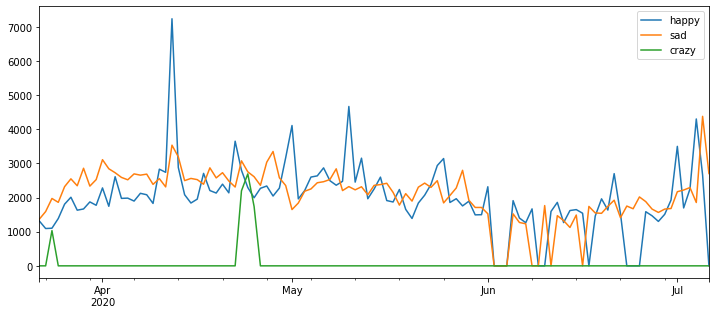

In [4]:
# use it as a function
# read all files and plot some information
def term_plot(keywords):
    t_range=pd.date_range('2020-03-22','2020-07-06')
#t_range
#keywords=['covid']
#keywords=['china']

#keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
#keywords=['trump','google','china','wuhan','virus','doctor','cuomo']

    df = DataFrame(index=t_range)             #a DataFrame to save selected data
    folder='../sample-code/data/covid-term/'  #folder with the data files

    #loop through each day
    for d in t_range:
        filename=folder + str(d)[:10] + '_top1000terms.csv'
        #print('filename --> ',filename)
        tw = pd.read_csv(filename, header=None, names=['term','frequency'])
    
        for key in keywords:
            tw_short=tw[tw['term']==key]
            if tw_short.shape[0]==0:   #check if the key exists or not
                f=0
            else:                      #sometimes there are two duplicates for the entry, not sure why
                tw_short2=tw_short.set_index(pd.Index(range(tw_short.shape[0])))        
                f=tw_short2.loc[0,'frequency']
            df.loc[d,key]=f
    df.plot(figsize=(12,5))
    return df
keywords=['covid','coronavirus','trump','google','china','wuhan','virus']
keywords=['happy','angry','mad','sad','insane','crazy']
keywords=['happy','sad','crazy']
df=term_plot(keywords)

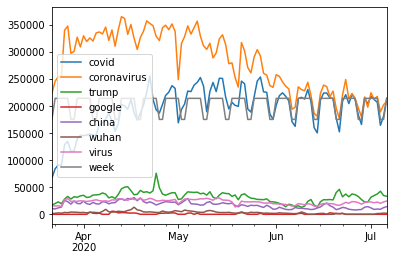

In [27]:
# trying to find the relation between 'covid' tweets and weekends.
# 2020-03-22 is sunday
mean = df.mean()['covid'] # get average
weekdays=mean*2
weekends=mean*0.1
flag=7  #1-5 for weekdays, 6-7 for weekends
for d in t_range:
    if ( flag <= 5 ):
        #weekdays
        df.loc[d,'week']=weekdays
    else:
        #weekends
        df.loc[d,'week']=weekends
    flag += 1
    if (flag > 7):
        flag = 1
df.plot()

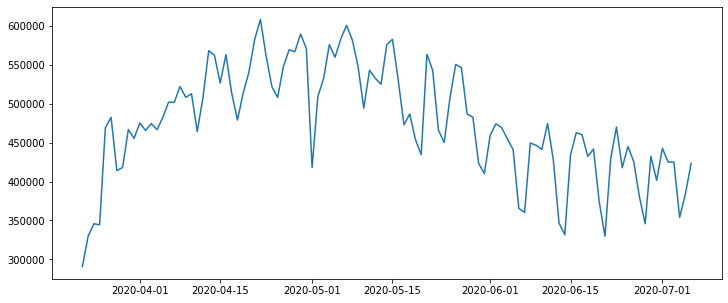

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df['covid']+df['coronavirus'])


anaylsis: talk about relation between covid tweets and weekday-weekend schedules.

### More to do
- check the frequency with weekdays and weekends
- check degree of anxiety from the keywords, and relate to daily new cases

## Final project

- Leo
  - trends of covid cases
  - difference between China and US, period, weekends pattern, total
  - write analysis for US cases
  - download China data for comparison.
  
- Jay
  - stocks of retail companies, 
  - diff in china and US
  - get data from yahoo finance and plot
  - write analysis
  - classify those companies by total price, trends and type
  
- James
  - crime
  - download excel and save as csv
  - read and plot in python



### crime data:
- https://nij.ojp.gov/funding/real-time-crime-forecasting-challenge
- https://oag.ca.gov/crime
- https://ucr.fbi.gov/crime-in-the-u.s/2019/preliminary-report/tables/table-1/table-1.xls
- https://ucr.fbi.gov/hate-crime/2018/tables/table-2.xls
- https://www.fbi.gov/services/cjis/ucr/publications#Hate-Crime%20Statistics
- https://web.archive.org/web/20160602124958/https://www.fbi.gov/news/stories/2014/november/crime-statistics-for-2013-released
- https://web.archive.org/web/20160428023232/http://www.disastercenter.com/crime/
- https://www.census.gov/quickfacts/fact/table/US/PST045219
- https://crime-statistics.co.uk/postcode/bt488hh


#### comment:

From those searching, it looks like crime statistics require quite a period for the data to come out. For concrete data, we can only get prelimilary data up to 2019. The data for 2020 is unstructured and hard to find.

This make sense because such researches require accurate historical data. On the other hand, what we intend to do, is using some temperary information to predict crime rates in near future. This may or may not be that accurate, but could provide a pespective. A previous approach from Twitter data can be found [here](https://sci-hub.st/https://www.researchgate.net/publication/323532548_Mining_Twitter_data_for_crime_trend_prediction)

### suggestions
try this project
https://nij.ojp.gov/funding/real-time-crime-forecasting-challenge


### Presentation

In [8]:
# crime data
# data source: arrested table from https://ucr.fbi.gov/crime-in-the-u.s
# read files into DataFrame and make sure they are in the same format
folder='../sample-code/data/us-crime/'
files=['table_31_number_and_rate_of_arrests_by_population_group_2015.xls',
       'table-18-2016.xls','table-31-2017.xls','table-31-2018.xls']
data=[]
for f in files[:]:
    filename = folder + f
    df=pd.read_excel(filename)
#    df
#    break
    df=df[5:-5]
    data.append(df)
    print(filename, df.head(2))
#df

../sample-code/data/us-crime/table_31_number_and_rate_of_arrests_by_population_group_2015.xls   Table 31 Unnamed: 1 Unnamed: 2 Unnamed: 3 Unnamed: 4 Unnamed: 5 Unnamed: 6  \
5      NaN    Total         Rate    Total         Rate      Total       Rate   
6   TOTAL2    8304874       3363    6034206     3576.2    1449692     3253.1   

  Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 13 Unnamed: 14 Unnamed: 15  \
5      Total       Rate      Total  ...       Total        Rate       Total   
6     933850     3454.4     949975  ...      887804      3699.4      973232   

  Unnamed: 16 Unnamed: 17 Unnamed: 18 Unnamed: 19 Unnamed: 20 Unnamed: 21  \
5        Rate       Total        Rate       Total        Rate       Total   
6      4912.8     1593867      2801.2      676801      3175.6     3484480   

  Unnamed: 22  
5        Rate  
6      3132.7  

[2 rows x 23 columns]
../sample-code/data/us-crime/table-18-2016.xls              Table 18  Unnamed: 1
5             Robbery     95754.0
6  Aggrav

[73230, 86088.0, 74340, 67397]


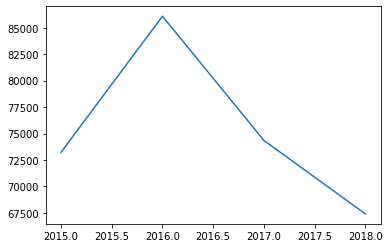

In [9]:
# now from these four tables, make a prediction for table in 2019 and 2020

# example: robbery in group II

# Group II (180 cities, 100,000 to 249,999;population 27,033,841)

# print and plot data

year=[2015,2016,2017,2018]
robbery=[]
for df in data:
    robbery.append(df.iloc[4,1])
print(robbery)

plt.plot(year,robbery)

The data from 2016 is not good, one should ignore it.

Now the question is, how to predict?

one option is linear fit/regression, find an expression for y = ax+b = a(x-x0)+y0



In [11]:
#slope
a=(robbery[3]-robbery[1])/4.0
y0=sum(robbery)/len(robbery)
x0=sum(year)/len(year) #average of year

def predict(x0,y0,a,x):
    y = a*(x-x0)+y0
    return y

print('2019:',predict(x0,y0,a,2019))
print('2020:',predict(x0,y0,a,2020))
print('2022:',predict(x0,y0,a,2022))

2019: 63581.875
2020: 58909.125
2022: 49563.625


In [71]:
# now it is time to predict everything all together

# make a new data frame with simlar header, and fill predicted values into it one by one



## Review

### Python basics
- IDE
  - anaconda, jupyterlab, jupyter notebook
  - Google CoLab
  - pyCharm, python, etc
- Files
  - .ipynb for notebook
  - .py for pure python codes
- datatype
  - int, float, string
  - list
- logics
  - condition, if
  - loop, for, while
- function
  - a set of commands
  - with parameters and returned value
- module
  - math
  - pandas, Series, DataFrame
  - matplotlab.pyplot
  - pandas_datareader
  
### Data science
- goal/title
- why? background/introduction
- data source
- visualization and analysis
- result/implication
- so what? conclustion/open queations

### More?
- how to learn more?
  - google is always your best friend
  - self-learn from internet
    - https://www.datacamp.com/courses/tech:python
    - https://realpython.com/
  - more classes
  - bookmark website for this class
  



